In [64]:
from sklearn import datasets
from sklearn.cluster import Birch
import pandas as pd
import seaborn as sns
import matplotlib as plt
from umap import UMAP

from DataSetFactory import DataSetFactory

In [2]:
n_samples = 1500
X_moons, y_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

In [7]:
df_moons = pd.DataFrame(X_moons, columns=['x', 'y'])
df_moons['label'] = y_moons

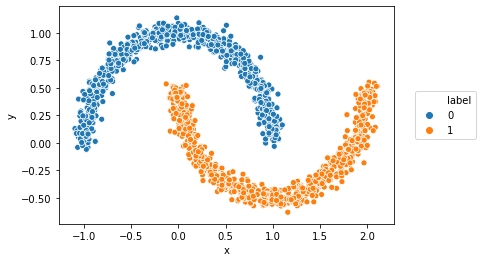

In [37]:
g = sns.scatterplot(x='x', y='y', hue='label', data=df_moons)
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

In [44]:
anchors_dfs = []
for label in sorted(df_moons['label'].unique()):
    df_label = df_moons[df_moons['label']==label]
    birch = Birch(threshold=0.30, branching_factor=50, n_clusters=None)
    birch.fit(df_label[['x', 'y']].values)
    tmp_df = pd.DataFrame(birch.subcluster_centers_, columns=['x', 'y'])
    tmp_df['label'] = label
    counts = pd.Series(birch.labels_).value_counts().to_frame()
    counts.columns = ['counts']
    tmp_df = tmp_df.merge(counts, left_index=True, right_index=True)
    anchors_dfs.append(tmp_df)
anchors_df = pd.concat(anchors_dfs)

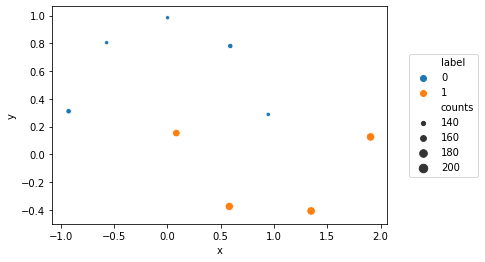

In [45]:
g = sns.scatterplot(x='x', y='y', hue='label', size='counts', data=anchors_df)
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

In [58]:
ds = DataSetFactory.get_dataset('hourglass')
ds.feature_cols = ['X', 'Y']

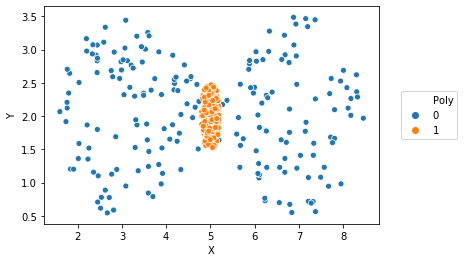

In [59]:
g = sns.scatterplot(x='X', y='Y', hue=ds.label_col, data=ds.df)
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

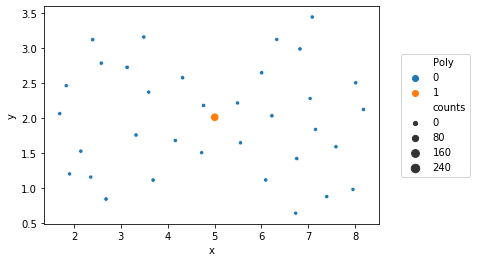

In [60]:
anchors_dfs_hg = []
for label in sorted(ds.df[ds.label_col].unique()):
    df_label = ds.df[ds.df[ds.label_col]==label]
    birch = Birch(threshold=0.30, branching_factor=50, n_clusters=None)
    birch.fit(df_label[ds.feature_cols].values)
    tmp_df = pd.DataFrame(birch.subcluster_centers_, columns=['x', 'y'])
    tmp_df[ds.label_col] = label
    counts = pd.Series(birch.labels_).value_counts().to_frame()
    counts.columns = ['counts']
    tmp_df = tmp_df.merge(counts, left_index=True, right_index=True)
    anchors_dfs_hg.append(tmp_df)
anchors_df_hg = pd.concat(anchors_dfs_hg)

g = sns.scatterplot(x='x', y='y', hue=ds.label_col, size='counts', data=anchors_df_hg)
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

# Birch and UMAP

In [92]:
ds = DataSetFactory.get_dataset('hourglass')

In [93]:
anchors_dfs_hg = []
for label in sorted(ds.df[ds.label_col].unique()):
    df_label = ds.df[ds.df[ds.label_col]==label]
    birch = Birch(threshold=0.30, branching_factor=50, n_clusters=None)
    birch.fit(df_label[ds.feature_cols].values)
    tmp_df = pd.DataFrame(birch.subcluster_centers_, columns=['x', 'y', 'z'])
    tmp_df[ds.label_col] = label
    counts = pd.Series(birch.labels_).value_counts().to_frame()
    counts.columns = ['counts']
    tmp_df = tmp_df.merge(counts, left_index=True, right_index=True)
    anchors_dfs_hg.append(tmp_df)
anchors_df_hg = pd.concat(anchors_dfs_hg)

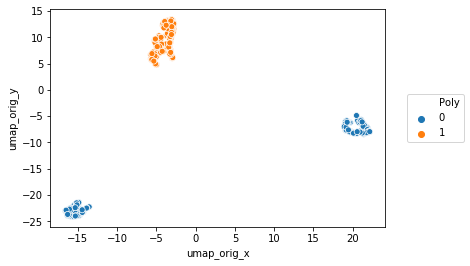

In [96]:
# UMAP on original data
umap_orig = UMAP(n_components=2)
umap_orig_res = umap_orig.fit_transform(ds.df[ds.feature_cols].values, ds.df[ds.label_col])
ds.df['umap_orig_x'] = umap_orig_res[:, 0]
ds.df['umap_orig_y'] = umap_orig_res[:, 1]
g = sns.scatterplot(x='umap_orig_x', y='umap_orig_y', hue=ds.label_col, data=ds.df)
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)

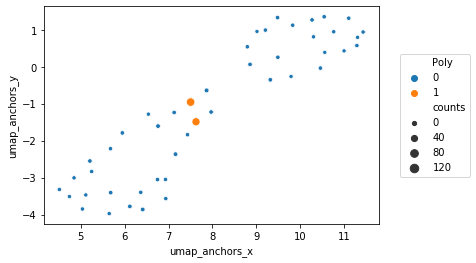

In [95]:
# UMAP on anchors
umap_anchors = UMAP(n_components=2)
umap_anchors_res = umap_anchors.fit_transform(anchors_df_hg[['x', 'y', 'z']].values)
anchors_df_hg['umap_anchors_x'] = umap_anchors_res[:, 0]
anchors_df_hg['umap_anchors_y'] = umap_anchors_res[:, 1]
g = sns.scatterplot(x='umap_anchors_x', y='umap_anchors_y', hue=ds.label_col, size='counts', data=anchors_df_hg)
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)